# Death and Birth Order

In a study by Zukewich et. al (Consolidating Birth-Death and Death-Birth Processes in Structured Populations, 2013) they found that cooperation with death-birth processes (death occuring in the simulation before birth)  is more favorable in some populations than cooperation with birth-death processes (birth occuring in the simulation before birth). I sought to implement it within the model I have been working with to see if it held true by implementing the process in the way they described.

Heatmap function for iterating by ben/cl

In [1]:
using JLD2
using StatsBase
using Plots
#backend(:plotly)
using DataFrames
using CSV

In [2]:
function dataRead(data, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 3, 5, 6, 8, 13, 14, 15, 16, 17, 4, 11, 10, 12, 7, 9, 1]] #used for soring by ben/cl, including graphCalcs
    #df = df[!, [6, 9, 2, 3, 7, 8, 10, 4, 5, 1]] #used for when sorting by pn/r
    #sort!(df, [:pn, :pr]) #used for when sorting by pn/r
    sort!(df, [:ben, :cl])
    dfData = Matrix{Float64}(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        for(j) in 1:range
            dataArr[i, j, 1] = dfData[range*(i-1)+j, index]
        end
    end
    #print(dataArr)
    dataArr
end

function hmap(data::String, range::Int, index::Int, titles::String, cLow::Float64, chI::Float64) 
    #indexes : 1 yidx   2 xidx   3 coopFreq   4 degree   5 fitness  6 pnc_end   7 pnd_end   8 prc_end  9 prd_end  10 shortestPath 11 connComponents 12 meanCCSize 13 largestCC 14 mean connection distance 15 distance  16 inclusion  17 assortment 
    dataArr = dataRead(data, range, index)
    x_axis = String[]
    y_axis = String[]
    for(i) in 1:range #PNC/PND times 10
        push!(x_axis, (string(round((0.4*i/range); digits = 4))))
        push!(y_axis, (string(round((10*i/range); digits = 3))))
    end
    p = heatmap(x_axis, y_axis,  dataArr[:, :, 1]; title = titles, xlabel="CL",ylabel="BEN", clim=(cLow,chI))
    p
end

hmap (generic function with 1 method)

# Death-Birth Order, with Neighbor-based Inheritance

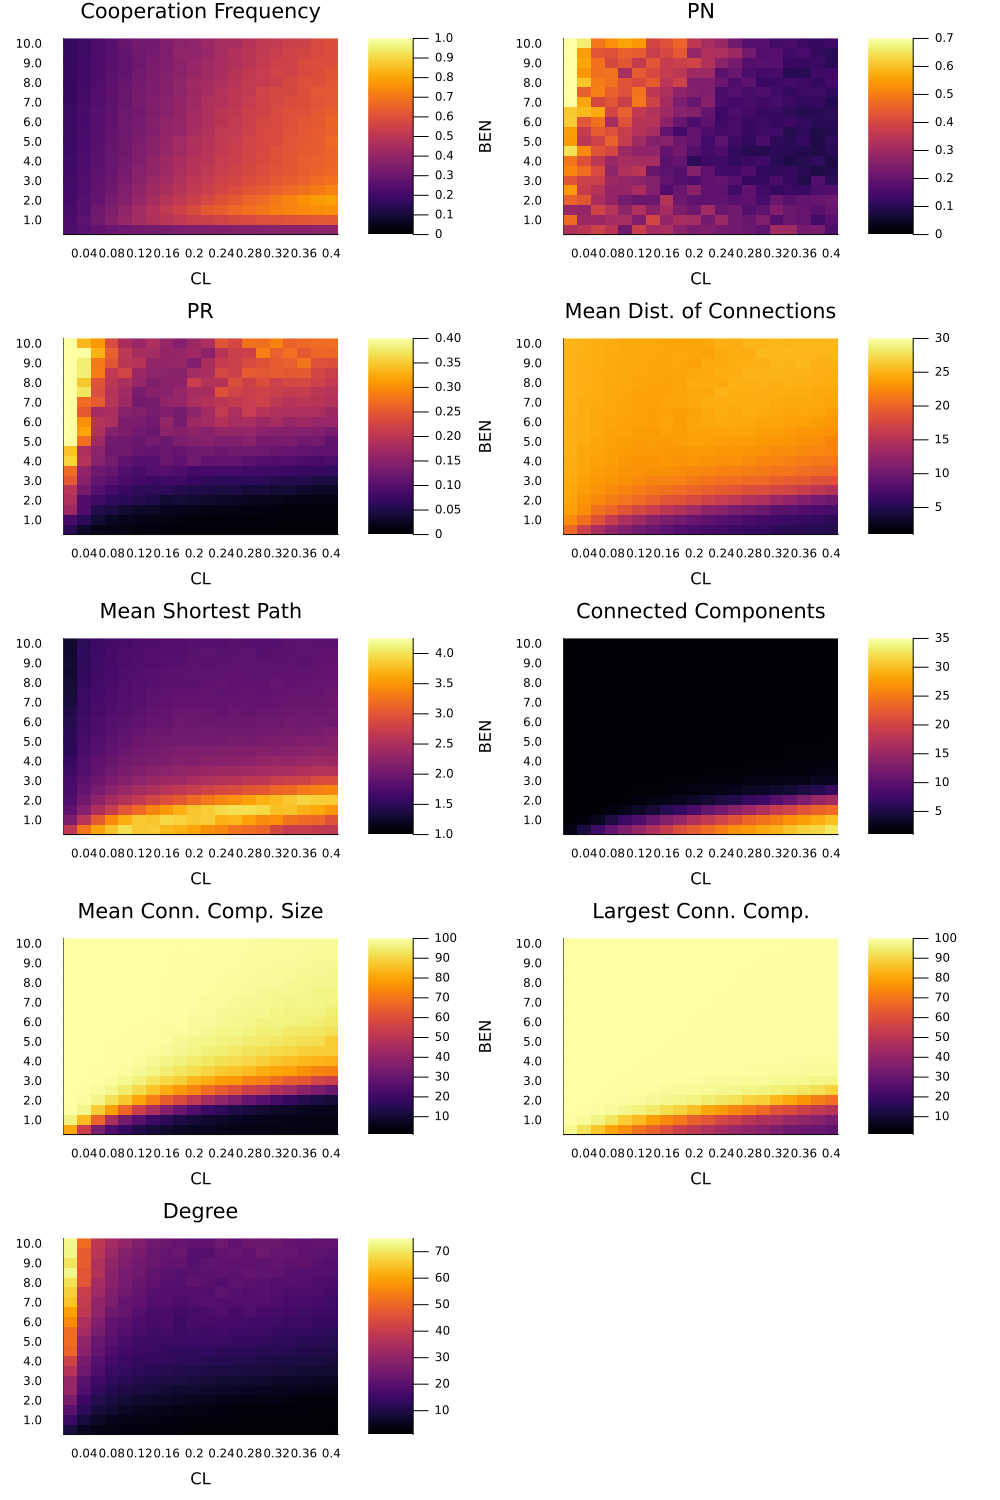

In [3]:
file = "neighbor_mom_no_pnd_fixed.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PN", 0.0, 0.7), 
hmap(file, 20, 8, "PR", 0.0, 0.40),
hmap(file, 20, 14, "Mean Dist. of Connections", 1.0, 30.0),
hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 35.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 1.0, 100.0),
hmap(file, 20, 4, "Degree", 1.0, 75.0)
]
#,

plot(fig1hmaps..., colorbar = true, grid=false, layout = (5,2), size = (1000, 1500)) 

**Figure 1** High strength of selection with death occuring before findMom and birth, pnd and prd not evolving separately. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, findMom=neighborMom, pnd=false, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10. Initial cooperation frequency was 0.5 .

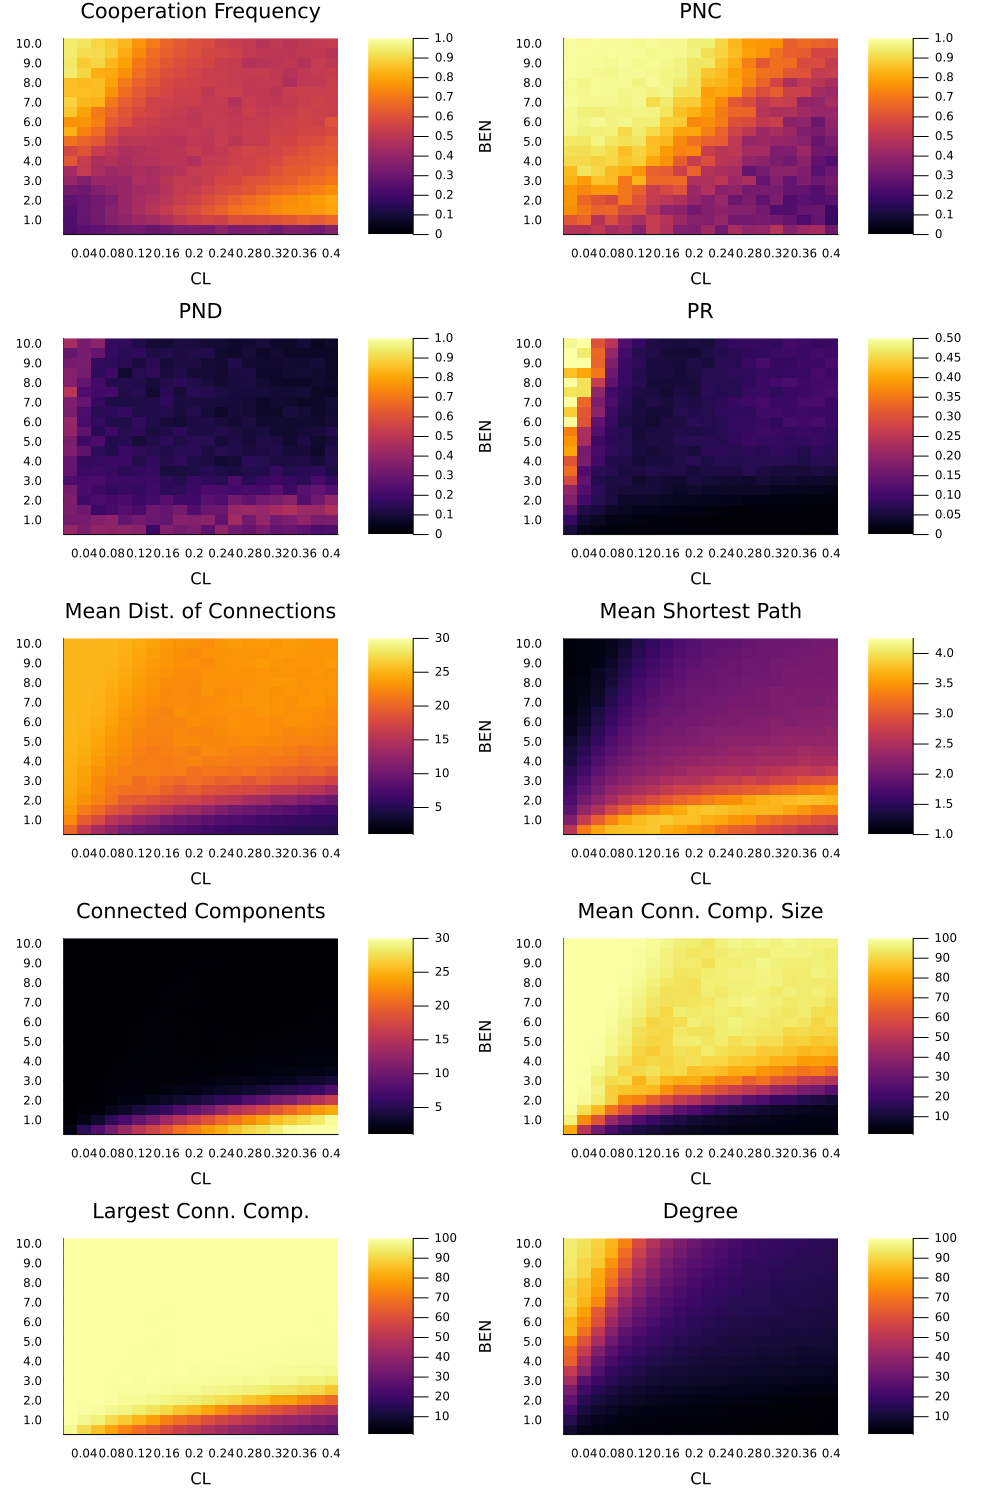

In [4]:
file = "neighbor_mom_pnd.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.0, 1.0), 
hmap(file, 20, 7, "PND", 0.0, 1.0),
hmap(file, 20, 8, "PR", 0.0, 0.50),
hmap(file, 20, 14, "Mean Dist. of Connections", 1.0, 30.0),
hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 30.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 1.0, 100.0),
hmap(file, 20, 4, "Degree", 1.0, 100.0)
]
#,

plot(fig1hmaps..., colorbar = true, grid=false, layout = (5,2), size = (1000, 1500)) 

**Figure 2** High strength of selection with death occuring before findMom and birth, pnd but not prd evolving separately. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, findMom=neighborMom, pnd=true, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10. Initial cooperation frequency was 0.5 . 

# Birth-Death Order

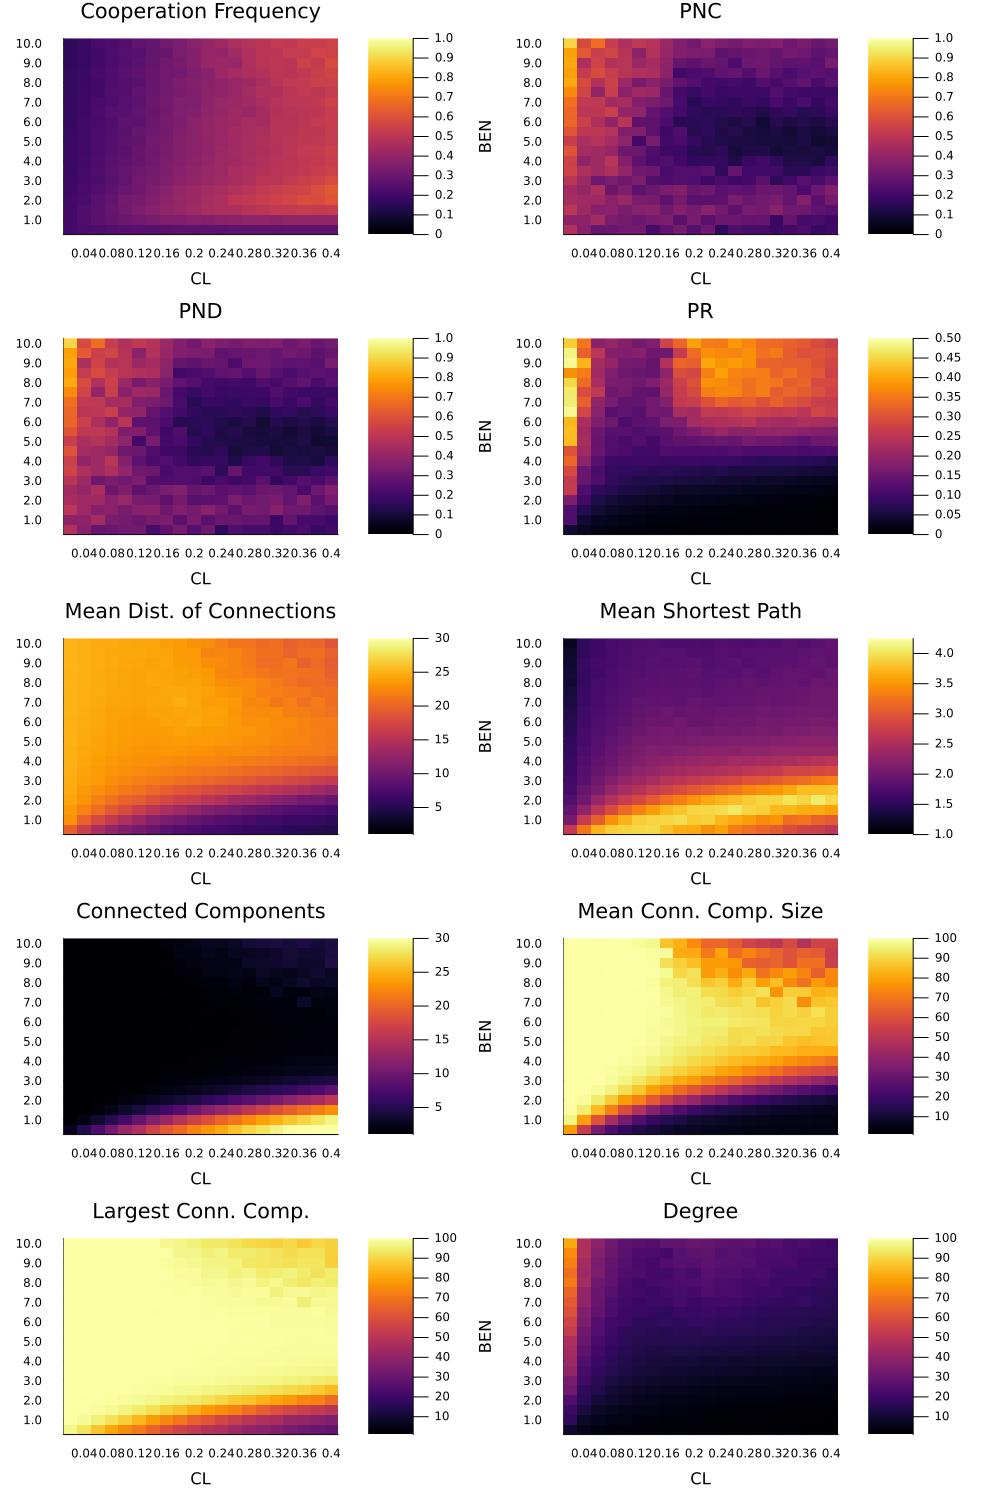

In [5]:
file = "birthdeath-no-pnd.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PN", 0.0, 1.0), 
hmap(file, 20, 8, "PR", 0.0, 0.60),
hmap(file, 20, 14, "Mean Dist. of Connections", 1.0, 30.0),
hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 30.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 1.0, 100.0),
hmap(file, 20, 4, "Degree", 1.0, 100.0)
]
#,

plot(fig1hmaps..., colorbar = true, grid=false, layout = (5,2), size = (1000, 1500)) 

**Figure 3** High strength of selection with findMom occuring before death, pnd and prd not evolving separately. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, findMom=neighborMom, pnd=false, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10. Initial cooperation frequency was 0.5 .

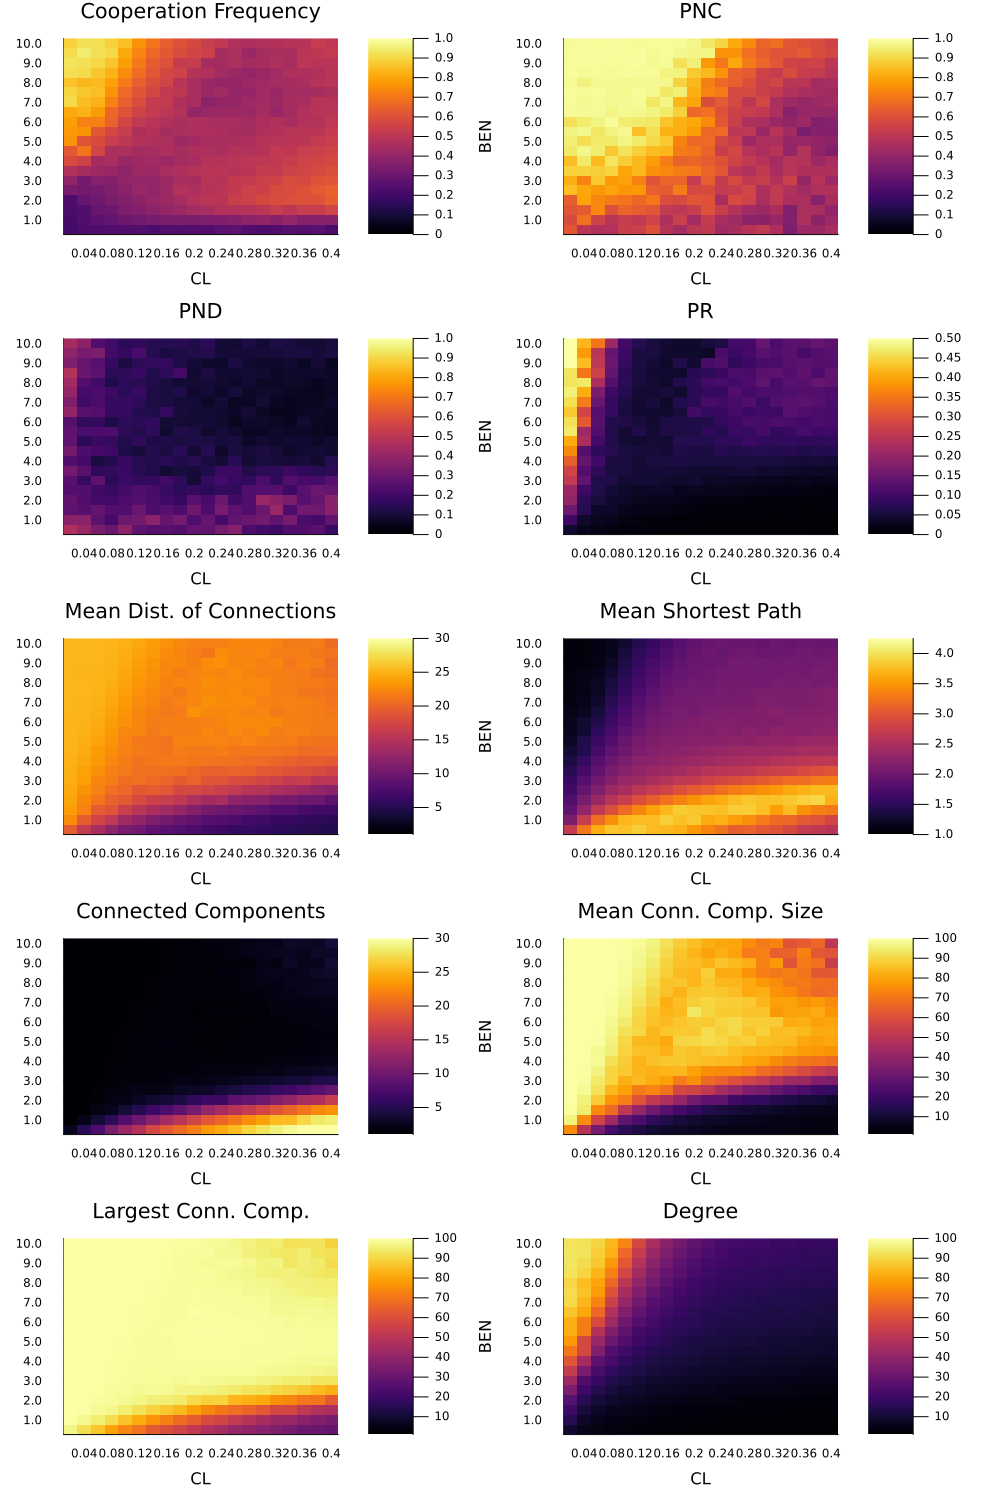

In [6]:
file = "birthdeath-with-pnd.csv"
fig1hmaps = [hmap(file, 20, 3, "Cooperation Frequency", 0.0, 1.0), 
hmap(file, 20, 6, "PNC", 0.0, 1.0), 
hmap(file, 20, 7, "PND", 0.0, 1.0),
hmap(file, 20, 8, "PR", 0.0, 0.50),
hmap(file, 20, 14, "Mean Dist. of Connections", 1.0, 30.0),
hmap(file, 20, 10, "Mean Shortest Path", 1.0, 4.25), 
hmap(file, 20, 11, "Connected Components", 1.0, 30.0), 
hmap(file, 20, 12, "Mean Conn. Comp. Size", 1.0, 100.0), 
hmap(file, 20, 13, "Largest Conn. Comp.", 1.0, 100.0),
hmap(file, 20, 4, "Degree", 1.0, 100.0)
]
#,

plot(fig1hmaps..., colorbar = true, grid=false, layout = (5,2), size = (1000, 1500)) 

**Figure 4** High strength of selection with findMom occuring before death, pnd but not prd evolving separately. The results above were created with: C=0.5, D=0.0, gen=100000, distInherit=false, distFactor=1.0, pn=0.5, findMom=neighborMom, pnd=true, pr=0.0001, prd=false, muP=0.01, delta=0.5, sigmapn=0.01, sigmapr=0.01, reps=10. Initial cooperation frequency was 0.5 . 

#Mixed Deathbirth Order

Heatmap for iterating by dbProb and cl